# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [16]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
api_key = weather_api_key
units = 'metric'
#today = date.today

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}q={city}&appid={api_key}&units={units}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | al wajh
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | berriane
Processing Record 5 of Set 1 | ad dujayl
Processing Record 6 of Set 1 | altai
Processing Record 7 of Set 1 | havre
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | lautoka
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | vorkuta
Processing Record 13 of Set 1 | aktau
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | kone
Processing Record 18 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 19 of Set 1 | arafat
Processing Record 20 of Set 1 | hotan
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | camapua
Proc

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [18]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
113,baliton,5.7436,125.2364,28.89,72,49,1.85,PH,1701994988
85,tangalle,6.0240,80.7911,24.60,91,21,1.11,LK,1701994976
482,duki,30.1541,68.5728,9.40,30,0,1.38,PK,1701995158
533,murun-kuren,49.6342,100.1625,-17.53,70,4,4.95,MN,1701995183
268,polyarnyye zori,67.3661,32.4981,-16.68,99,99,1.52,RU,1701995058
182,churapcha,62.0025,132.4325,-32.53,98,100,2.67,RU,1701995022
424,gaspe,48.8334,-64.4819,-3.88,68,100,6.69,CA,1701995134
366,tanhacu,-14.0214,-41.2481,24.90,56,24,3.44,BR,1701995105
477,sawakin,19.1059,37.3321,26.44,77,7,2.08,SD,1701995156
125,ambovombe,-25.1667,46.0833,21.24,87,30,6.10,MG,1701994994


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
491,pujili,-0.9500,-78.6833,13.05,87,75,4.12,EC,1701995162
393,loyew,51.9458,30.7953,-4.29,95,100,3.99,BY,1701995120
385,dundaga,57.5167,22.3500,-5.68,93,100,4.71,LV,1701995116
258,north battleford,52.7834,-108.2847,1.05,80,100,4.63,CA,1701994891
358,dolni dabnik,43.4000,24.4333,1.90,93,100,2.06,BG,1701995100
406,katsuura,35.1333,140.3000,12.75,43,0,3.21,JP,1701995125
387,tindouf,27.6711,-8.1474,17.25,51,40,2.06,DZ,1701995117
133,praia da vitoria,38.7333,-27.0667,19.31,94,75,9.91,PT,1701994999
37,la jolla,32.8473,-117.2742,18.55,76,20,3.60,US,1701994956


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

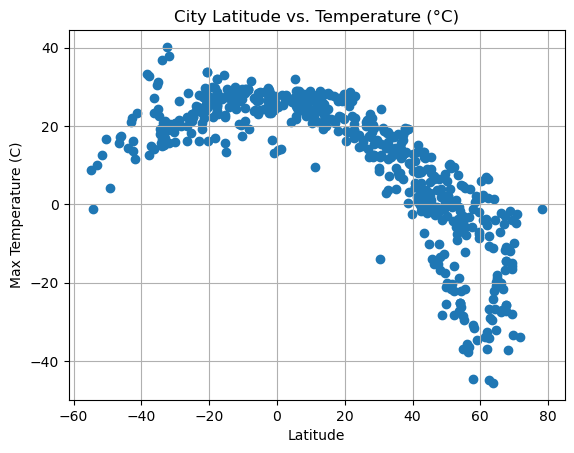

In [24]:
# Build scatter plot for latitude vs. temperature
y_value = [city["Max Temp"] for city in city_data]
x_value = [city["Lat"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Temperature (°C)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

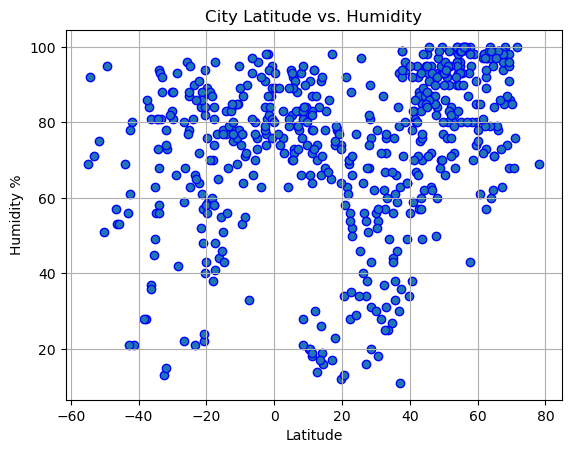

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='blue')


# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

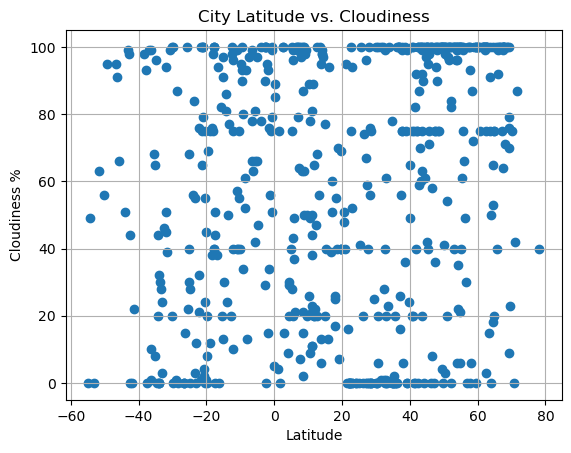

In [34]:
# Build the scatter plots for latitude vs. cloudiness
x_value = [city["Lat"] for city in city_data]
y_value = [city["Cloudiness"] for city in city_data]
plt.scatter(x_value, y_value)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

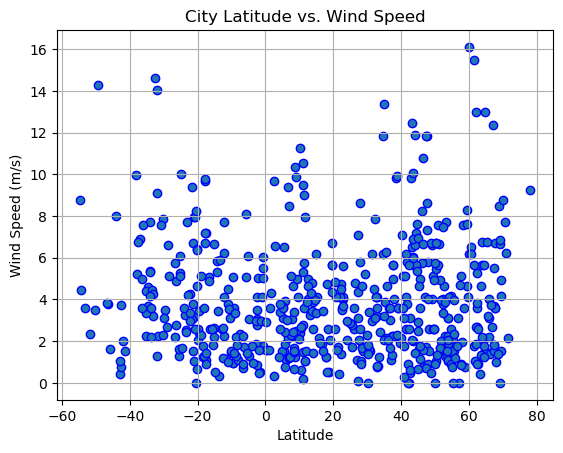

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [131]:
# Define a function to create Linear Regression plots
def lineRegression(x, y, x_Text, y_Text):
    slope, intercept, r_value, p_value, stderr = linregress(x, y)
    si = slope * x + intercept

    print(f'r-value = {r_value}')

    plt.scatter(x, y)
    plt.text(x_Text, y_Text, s=f"y = {round(slope, 2)}x + {round(intercept, 2)}", fontsize="20")
    plt.plot(x, si, color="Red")

In [132]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.sample(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
396,lethbridge,49.7000,-112.8186,0.45,93,100,2.57,CA,1701994644
124,tazovsky,67.4667,78.7000,-27.29,96,64,5.49,RU,1701994908
399,fort bragg,35.1390,-79.0060,9.34,56,0,2.06,US,1701995122
478,bodo,67.2800,14.4050,-2.98,63,75,12.35,NO,1701995156
136,bamboo flat,11.7000,92.7167,25.05,94,20,1.03,IN,1701994451


In [133]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.sample(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
193,araucaria,-25.5931,-49.4103,21.29,96,100,1.31,BR,1701995026
33,katabu,-4.9333,122.5167,28.75,73,97,3.07,ID,1701994955
362,minas de marcona,-15.2119,-75.1103,15.74,77,13,6.68,PE,1701995102
345,daru,-9.0763,143.2092,29.39,64,80,3.37,PG,1701995095
270,sechura,-5.5569,-80.8222,23.14,70,42,8.12,PE,1701995059


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.8458061832920875


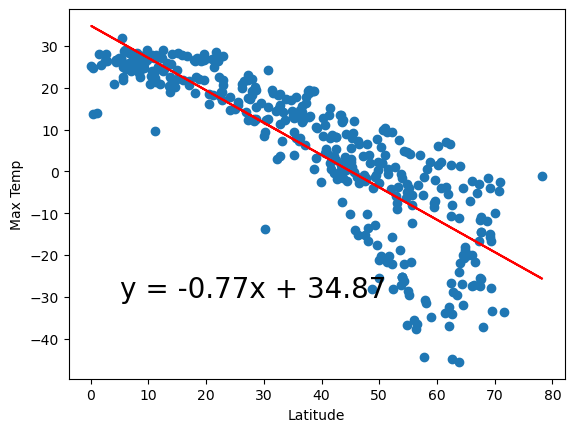

In [142]:
# Linear regression on Northern Hemisphere
lineRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 5, -30)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

r-value = 0.5010202465528119


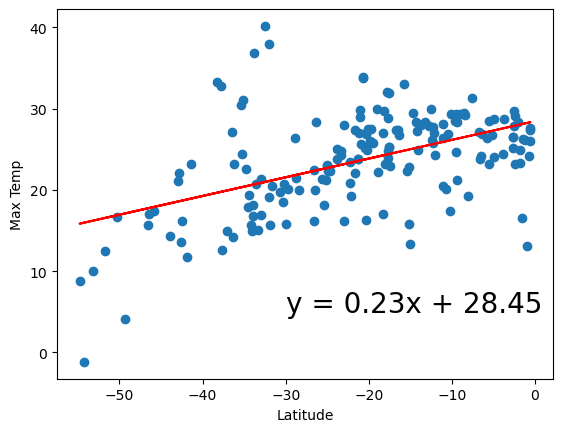

In [135]:
# Linear regression on Southern Hemisphere
lineRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -30, 5)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.3498515437753302


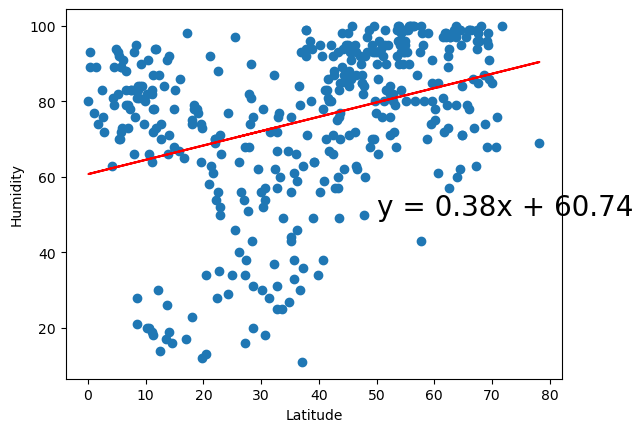

In [145]:
# Northern Hemisphere
lineRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 50, 50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

r-value = 0.2745887861710071


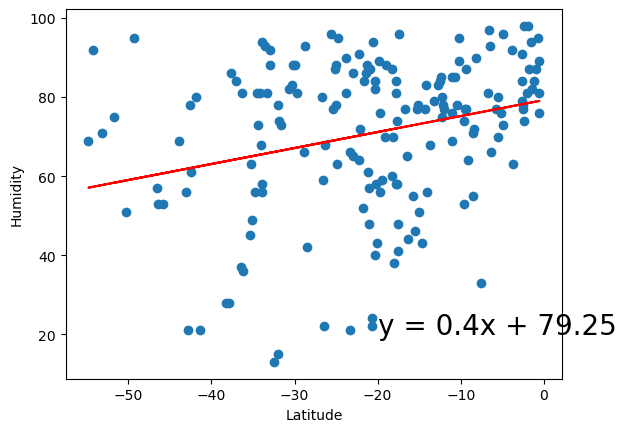

In [146]:
# Southern Hemisphere
lineRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -20, 20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.27872096104176053


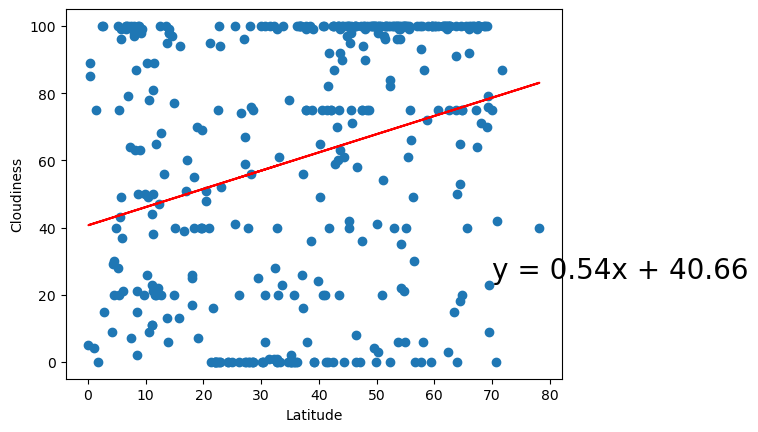

In [148]:
# Northern Hemisphere
lineRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 70, 25)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

r-value = 0.2537029840796306


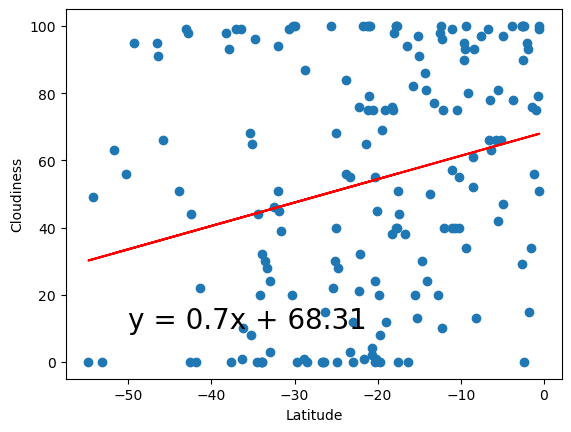

In [149]:
# Southern Hemisphere
lineRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -50, 10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.08835877767459452


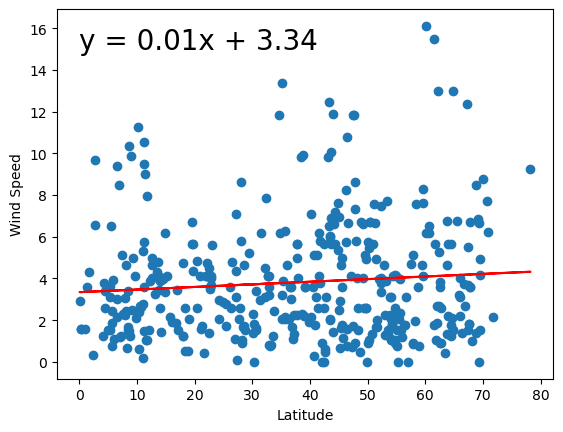

In [140]:
# Northern Hemisphere
lineRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

r-value = -0.26287503992534267


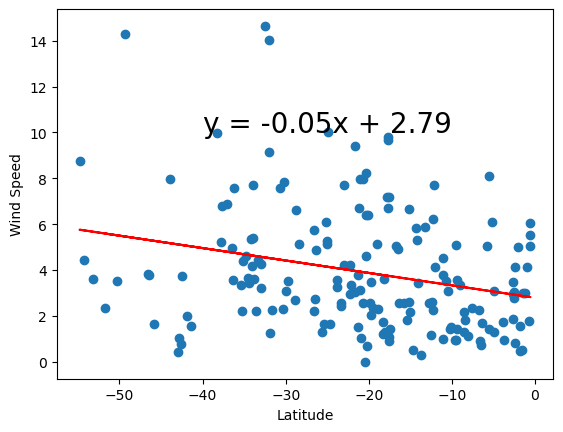

In [153]:
# Southern Hemisphere
lineRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -40, 10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE